# Superdense Coding

Source: https://qiskit.org/textbook/ch-algorithms/superdense-coding.html

In [1]:
from qiskit import QuantumCircuit
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram

In [2]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a, b)

In [7]:
def encode_message(qc, qubit, msg):
        if msg == '00':
            pass
        elif msg == '10':
            qc.x(qubit)
        elif msg == '01':
            qc.z(qubit)
        elif msg == '11':
            qc.z(qubit)
            qc.x(qubit)
        else:
            print('Invalid message, sending "00"')

In [8]:
def decode_message(qc, a, b):
    qc.cx(a, b)
    qc.h(a)

In [9]:
qc = QuantumCircuit(2)

create_bell_pair(qc, 0, 1)
qc.barrier()

message = '10'

encode_message(qc, 0, message)
qc.barrier()

decode_message(qc, 0, 1)

qc.measure_all()
qc.draw()

┌───┐      ░ ┌───┐ ░      ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■───░─┤ X ├─░───■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐ ░ └───┘ ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░───────░─┤ X ├──────░──╫─┤M├
             └───┘ ░       ░ └───┘      ░  ║ └╥┘
meas: 2/═══════════════════════════════════╩══╩═
                                           0  1

#### Visualizing measurements

{'10': 1024}


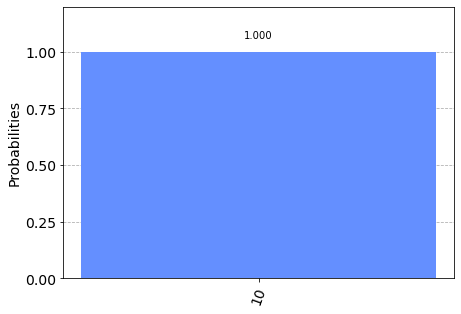

In [10]:
aer_sim = Aer.get_backend('aer_simulator')

qobj = assemble(qc)
result = aer_sim.run(qobj).result()

counts = result.get_counts()
print(counts)

plot_histogram(counts)

#### Superdense coding on a real QC

In [11]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [12]:
shots = 1024

IBMQ.load_account()

provider = IBMQ.get_provider(hub = 'ibm-q')

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))

print(f"Least busy backend: {backend}")

t_qc = transpile(qc, backend, optimization_level=3)

job = backend.run(t_qc)

Least busy backend: ibmq_lima


In [18]:
from qiskit.tools.monitor import job_monitor
import numpy as np

In [15]:
job_monitor(job)

Job Status: job has successfully run


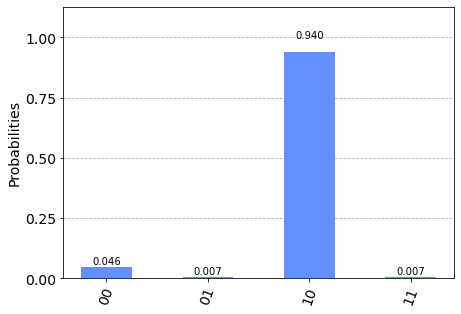

In [16]:
result = job.result()

plot_histogram(result.get_counts(qc))

In [19]:
correct_results = result.get_counts(qc)[message]

accuracy = (correct_results/shots) * 100

print(f"Accuracy: {np.round(accuracy,2)}%")

Accuracy: 94.04%
